<a href="https://colab.research.google.com/github/Kasrakko/PyTorch-Deep-Learning/blob/main/NN02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch 
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report
torch.__version__

'1.13.1+cu116'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## Neural network classificiation pyTorch

In [4]:
# make 1000 samples 
n_samples = 1000

# Create Create circles 
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)
len(X), len(y),

(1000, 1000)

In [5]:
print(f"print first 5 sample of X:\n{X[:5]}\n")
print(f"print first 5 sample of y:\n{y[:5]}")

print first 5 sample of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

print first 5 sample of y:
[1 1 1 1 0]


In [6]:
# Making data frame of circles data with pandas
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

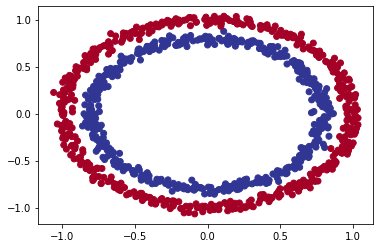

In [8]:
# Visualize, Visualize, Visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)   

***Note:*** 

The data we are workig with is often reffred to as a toy dataset, a data set that is samll enogh to expreiment but still size sizeable enough to predict the fundamentals.

### 1.1 Check input output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# View the first example of the features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}\t and the same for y:{y_sample}\n")
print(f"Shapes for one sample of X:{X_sample.shape}\t and the same for y:{y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074]	 and the same for y:1

Shapes for one sample of X:(2,)	 and the same for y:()


### 1.2 Turn data into tensor and create train and test splits

In [11]:
# Turn data into tesnsor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f"the first 5 values of X:\n {X[:5]}\n\n the first 5 values of y:\n {y[:5]}\n\n len X:{len(X)}\t\t le y:{len(y)}")

the first 5 values of X:
 tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

 the first 5 values of y:
 tensor([1., 1., 1., 1., 0.])

 len X:1000		 le y:1000


In [12]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
# Split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # Like the manual seed 


In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

Lets build a model to classify our blue and red dots

To do so, we want to:
1. Setup device agonistic code so our will run on an accelerator (GPU)
2. Construct the model 
3. Define loss function and optimizer
4. Create train and test loop

### 1. Setup constructor

In [15]:
# 1. Step one is check the cuda code block
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 2. Create model

In [16]:
# 2. Create our model
class CircleModelV0(nn.Module):
  # 2.1 Build the constructor
  def __init__(self):
    super().__init__()
    # Create nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (same shape of x (INPUT)) and unscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape of y)

  # 2.2 Define the forward methode
  def forward(self, x :torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # X -> layer_1 -> layer_2 -> y
  
  # 2.3 Instantiate an instance of our model class and send it to the target device
model_0 =  CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5807,  0.1193],
                      [ 0.4477, -0.6579],
                      [-0.1899, -0.2841],
                      [-0.5909, -0.2224],
                      [ 0.4467,  0.0725]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.1481,  0.4992, -0.6693,  0.5229, -0.5238], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1481,  0.3234, -0.2405,  0.3773, -0.1276]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.4201], device='cuda:0'))])

### 3. Setup loss function and optimizer

Whcich loos function or optimizer should you use?

Based on problem is diffrent.

For example, for redression you might want MAE or MSE

For classification you might want binarry cross entropy loss or categorical cross entropy

As a reminder, the loss function is a messure how much our model is working **wrong**

And for optimizer, two of the modyt common and usefull functions are SGD and Adam.

* For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`

In [18]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # has sigmond activation function

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [19]:
# Calculate the accuracy
def accuracy_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc

### Train loop 
1. forward pass

2. Calculate the loss

3. Optimizer zero grad

4. Losss backward(backpropagation)

5. Optim step step step

#### Going from raw logits -> prediction probabilites -> prediction labels

Our moddel out put are going to be raw logits.

we can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. SIGMOID or SOFTMAX)

then we can convert our models prediction probilities to prediction labels by either them rounding them or taking the `argmax()`

In [20]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0800],
        [-0.0594],
        [ 0.3921],
        [-0.0082],
        [ 0.3077]], device='cuda:0')

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [22]:
# Use sigmoid activation forward on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5200],
        [0.4852],
        [0.5968],
        [0.4979],
        [0.5763]], device='cuda:0')

In [23]:
torch.round(y_pred_probs)

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [24]:
# find the predicted labels 
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension 
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
# define the epochs
epochs = 100

# Set data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# define the value for analysis
epoch_count = []
loss_values = []
test_lost_values = []

# bulid the training loop
for epoch in range(epochs):
  ### Training 
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # logIts -> pred probs -> pred labels
  
  # Calculate the loss / accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_preds=y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optim step
  optimizer.step()

  ### Testing
  model_0.eval()
  # Forward pass
  test_logits = model_0(X_test).squeeze()
  test_preds = torch.round(torch.sigmoid(test_logits))

  # Calculate the loss / accuracy
  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true=y_test,
                         y_preds=test_preds)
  
  # PRINT WHAT HAPPENIN
  if epoch % 10 == 0:
    print(f"Epochs: {epoch} | Loss: {loss:.5f}, ACC: {acc:.2f}%, | Test Loss: {test_loss:.5f}, Test ACC: {test_acc:.2f}%")

Epochs: 0 | Loss: 0.70434, ACC: 53.62%, | Test Loss: 0.69413, Test ACC: 53.00%
Epochs: 10 | Loss: 0.69903, ACC: 51.25%, | Test Loss: 0.69122, Test ACC: 53.50%
Epochs: 20 | Loss: 0.69718, ACC: 49.75%, | Test Loss: 0.69065, Test ACC: 53.00%
Epochs: 30 | Loss: 0.69629, ACC: 49.38%, | Test Loss: 0.69062, Test ACC: 54.00%
Epochs: 40 | Loss: 0.69573, ACC: 48.88%, | Test Loss: 0.69071, Test ACC: 54.50%
Epochs: 50 | Loss: 0.69530, ACC: 48.25%, | Test Loss: 0.69083, Test ACC: 54.00%
Epochs: 60 | Loss: 0.69496, ACC: 48.12%, | Test Loss: 0.69097, Test ACC: 54.00%
Epochs: 70 | Loss: 0.69468, ACC: 48.50%, | Test Loss: 0.69110, Test ACC: 53.00%
Epochs: 80 | Loss: 0.69444, ACC: 48.50%, | Test Loss: 0.69125, Test ACC: 53.50%
Epochs: 90 | Loss: 0.69424, ACC: 49.12%, | Test Loss: 0.69139, Test ACC: 53.50%


## Make predictions and evaluation 

### add extra library to pyTorch

In [63]:
import requests 
from pathlib import Path

# Download helper functions from learn pyTorch repo (if its not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

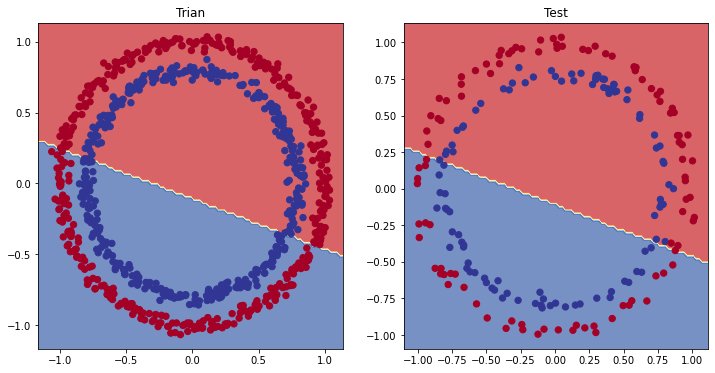

In [28]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Trian")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## Improving a model

* Add more layers - give the model more chances to learn about patterns in data

* Add more hidden units (go from 5 hidden units to 10 hidden units)

* Fit for longer

* Changing the activation functions

* Change the learning rate

* change the loss function

In [29]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5702,  0.0991],
                      [ 0.4749, -0.6045],
                      [-0.2153, -0.3353],
                      [-0.5596, -0.1608],
                      [ 0.4391,  0.0578]])),
             ('layer_1.bias',
              tensor([-0.1412,  0.4842, -0.6586,  0.5054, -0.5183])),
             ('layer_2.weight',
              tensor([[-0.0602,  0.2182, -0.2926,  0.2549, -0.0442]])),
             ('layer_2.bias', tensor([-0.4678]))])

In [30]:
# Add layer and define the layers with diffrent way
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z= self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5702,  0.0991],
                      [ 0.4749, -0.6045],
                      [-0.2153, -0.3353],
                      [-0.5596, -0.1608],
                      [ 0.4391,  0.0578]])),
             ('layer_1.bias',
              tensor([-0.1412,  0.4842, -0.6586,  0.5054, -0.5183])),
             ('layer_2.weight',
              tensor([[-0.0602,  0.2182, -0.2926,  0.2549, -0.0442]])),
             ('layer_2.bias', tensor([-0.4678]))])

In [32]:
model_1.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.2024, -0.1787],
                      [ 0.1947,  0.1763],
                      [ 0.0443, -0.6322],
                      [-0.3945, -0.0693],
                      [-0.3659, -0.1784],
                      [ 0.1117, -0.2512],
                      [ 0.3308, -0.1054],
                      [ 0.3345,  0.2122],
                      [-0.5854, -0.2501],
                      [-0.2612,  0.4908]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6222, -0.5797, -0.6848, -0.1954, -0.2159,  0.0826,  0.3047,  0.4418,
                      -0.5499,  0.4018], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2484,  0.1068,  0.1588, -0.1199,  0.1538, -0.1781,  0.2990, -0.1169,
                       -0.1376,  0.0873],
                      [ 0.0607, -0.0907, -0.2546, -0.1897,  0.0303,  0.0061, -0.0113,  0.2664,
                        0.0049, -0.2032],
                      [ 0.1425,  0.3027,  0.2324,  0

In [33]:
# Create a loss function
loss_fn =  nn.BCEWithLogitsLoss()
# Creeate an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [34]:
# Write a training loop and evaluate loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training 
  model_1.train()
  # Forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # Loss function / Accuracy

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                 y_preds=y_preds)
  
  # Optimizer zero grad
  optimizer.zero_grad()

  # loss backward 
  loss.backward()

  # otimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # Loss function / Accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_preds=test_preds)
    
    # PRINT OUT WHAT'S HAPPENING 
  if epoch % 100 == 0:
    print(f"Epochs: {epoch} | Loss: {loss:.5f}, ACC: {acc:.2f}%, | Test Loss: {test_loss:.5f}, Test ACC: {test_acc:.2f}%")

Epochs: 0 | Loss: 0.69311, ACC: 54.25%, | Test Loss: 0.69460, Test ACC: 51.00%
Epochs: 100 | Loss: 0.69298, ACC: 51.12%, | Test Loss: 0.69446, Test ACC: 47.00%
Epochs: 200 | Loss: 0.69298, ACC: 51.25%, | Test Loss: 0.69453, Test ACC: 46.00%
Epochs: 300 | Loss: 0.69298, ACC: 51.62%, | Test Loss: 0.69457, Test ACC: 45.00%
Epochs: 400 | Loss: 0.69298, ACC: 51.38%, | Test Loss: 0.69461, Test ACC: 45.00%
Epochs: 500 | Loss: 0.69298, ACC: 51.25%, | Test Loss: 0.69463, Test ACC: 45.00%
Epochs: 600 | Loss: 0.69298, ACC: 51.12%, | Test Loss: 0.69464, Test ACC: 46.00%
Epochs: 700 | Loss: 0.69298, ACC: 51.12%, | Test Loss: 0.69465, Test ACC: 46.00%
Epochs: 800 | Loss: 0.69298, ACC: 51.12%, | Test Loss: 0.69466, Test ACC: 46.00%
Epochs: 900 | Loss: 0.69298, ACC: 51.12%, | Test Loss: 0.69467, Test ACC: 46.00%


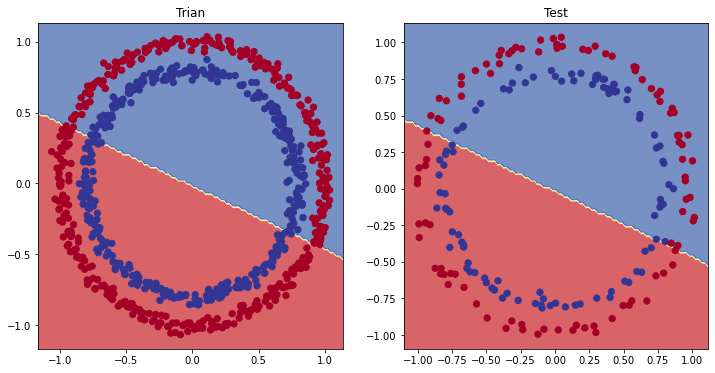

In [35]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Trian")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can fit a strIGHT line

one way to troubleshot a large problem is to test out a smaller problem

In [36]:
# Make data to test 

weight =0.7
bias = 0.3 
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# Create train and test splite
train_split = int(0.8*len(X_regression))
X_regression_train, y_regression_train = X_regression[:train_split], y_regression[:train_split]
X_regression_test, y_regression_test = X_regression[train_split:], y_regression[train_split:]
len(X_regression_train), len(X_regression_test), len(y_regression_train), len(y_regression_test)

(80, 20, 80, 20)

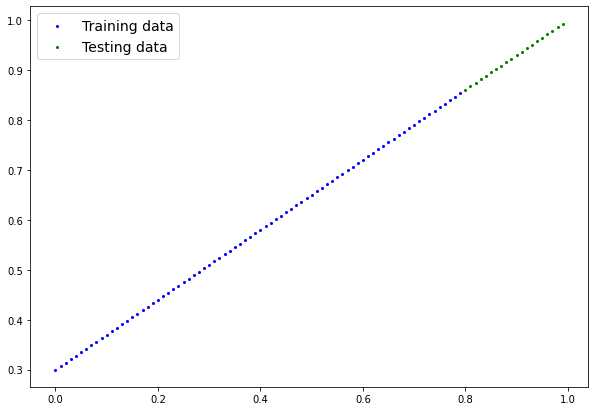

In [38]:
plot_predictions(train_data=X_regression_train,
                     train_labels=y_regression_train,
                     test_data=X_regression_test,
                     test_labels=y_regression_test,
);


In [39]:
# Same architecture but with `nn.Sequential`
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
# Loos and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [41]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 2000

# Put the data on the target device
X_regression_train, y_regression_train = X_regression_train.to(device), y_regression_train.to(device)
X_regression_test, y_regression_test = X_regression_test.to(device), y_regression_test.to(device)
for epoch in range(epochs):
  ### train mode
  model_2.train()
  # forward pass
  y_preds = model_2(X_regression_train)
  # loss
  loss = loss_fn(y_preds, y_regression_train)
  #optim
  optimizer.zero_grad()
  # backward
  loss.backward()
  # step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # forward pass
    test_preds = model_2(X_regression_test)
    # loss
    test_loss = loss_fn(test_preds, y_regression_test)
    # whats happenin
  if epoch % 100 == 0:
    print(f"Epochs: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epochs: 0 | Loss: 0.75986 | Test Loss: 0.94965
Epochs: 100 | Loss: 0.40272 | Test Loss: 0.54029
Epochs: 200 | Loss: 0.05876 | Test Loss: 0.13480
Epochs: 300 | Loss: 0.01461 | Test Loss: 0.03342
Epochs: 400 | Loss: 0.00308 | Test Loss: 0.00008
Epochs: 500 | Loss: 0.00309 | Test Loss: 0.00012
Epochs: 600 | Loss: 0.00309 | Test Loss: 0.00018
Epochs: 700 | Loss: 0.00299 | Test Loss: 0.00011
Epochs: 800 | Loss: 0.00299 | Test Loss: 0.00016
Epochs: 900 | Loss: 0.00289 | Test Loss: 0.00011
Epochs: 1000 | Loss: 0.00289 | Test Loss: 0.00015
Epochs: 1100 | Loss: 0.00290 | Test Loss: 0.00020
Epochs: 1200 | Loss: 0.00279 | Test Loss: 0.00014
Epochs: 1300 | Loss: 0.00280 | Test Loss: 0.00019
Epochs: 1400 | Loss: 0.00281 | Test Loss: 0.00025
Epochs: 1500 | Loss: 0.00270 | Test Loss: 0.00018
Epochs: 1600 | Loss: 0.00271 | Test Loss: 0.00023
Epochs: 1700 | Loss: 0.00260 | Test Loss: 0.00017
Epochs: 1800 | Loss: 0.00261 | Test Loss: 0.00022
Epochs: 1900 | Loss: 0.00261 | Test Loss: 0.00027


<ipython-input-42-a5e0b840fa8a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(train_data = np.array(torch.tensor(X_regression_train).cpu().numpy()),
<ipython-input-42-a5e0b840fa8a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = np.array(torch.tensor(y_regression_train).cpu().numpy()),
<ipython-input-42-a5e0b840fa8a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = np.array(torch.tensor(X_regression_test).cpu().numpy()),
<ipython-input-42-a5e0b840fa8a>:4: UserWarning: To copy construct from 

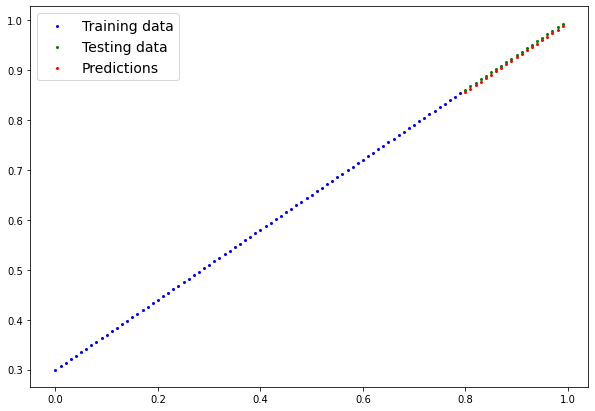

In [42]:
plot_predictions(train_data = np.array(torch.tensor(X_regression_train).cpu().numpy()),
                     train_labels = np.array(torch.tensor(y_regression_train).cpu().numpy()),
                     test_data = np.array(torch.tensor(X_regression_test).cpu().numpy()),
                     test_labels = np.array(torch.tensor(y_regression_test).cpu().numpy()),
                     predictions = np.array(torch.tensor(test_preds).cpu().numpy())
);


***Conclusion***

We cant draw an linear line in non stright line ==> we need nonLinear activation functions

## nonLinearity

In [64]:
# Create a model with non linear activation function
class CircleModelV1NonLinear(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1_non_linear = CircleModelV1NonLinear().to(device)
model_1_non_linear

CircleModelV1NonLinear(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [65]:
# Loss and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1_non_linear.parameters(),
                            lr = 0.1)

In [46]:
# Accuracy
def accuracy_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc

In [67]:
# Train and Test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1_non_linear.train()
  
  # Forward pass
  y_logits = model_1_non_linear(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # Loss / Acc
  train_loss = loss_fn(y_logits, y_train)
  train_acc = accuracy_fn(y_true=y_train,
                    y_preds=y_preds)

  # optim
  optimizer.zero_grad()

  # Loss backward
  train_loss.backward()

  # Optimizer step
  optimizer.step()

  ### Test
  model_1_non_linear.eval()
  
  with torch.inference_mode():
    # forward pass
    test_logits = model_1_non_linear(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # Loss / Acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                         y_preds=test_preds)

  ### Print what happenin
  if epoch % 100 == 0:
    print(f"Epochs: {epoch} | Loss: {train_loss:.5f}, ACC: {train_acc:.2f}%, | Test Loss: {test_loss:.5f}, Test ACC: {test_acc:.2f}%") 


Epochs: 0 | Loss: 0.69295, ACC: 50.00%, | Test Loss: 0.69319, Test ACC: 50.00%
Epochs: 100 | Loss: 0.69115, ACC: 52.88%, | Test Loss: 0.69102, Test ACC: 52.50%
Epochs: 200 | Loss: 0.68977, ACC: 53.37%, | Test Loss: 0.68940, Test ACC: 55.00%
Epochs: 300 | Loss: 0.68795, ACC: 53.00%, | Test Loss: 0.68723, Test ACC: 56.00%
Epochs: 400 | Loss: 0.68517, ACC: 52.75%, | Test Loss: 0.68411, Test ACC: 56.50%
Epochs: 500 | Loss: 0.68102, ACC: 52.75%, | Test Loss: 0.67941, Test ACC: 56.50%
Epochs: 600 | Loss: 0.67515, ACC: 54.50%, | Test Loss: 0.67285, Test ACC: 56.00%
Epochs: 700 | Loss: 0.66659, ACC: 58.38%, | Test Loss: 0.66322, Test ACC: 59.00%
Epochs: 800 | Loss: 0.65160, ACC: 64.00%, | Test Loss: 0.64757, Test ACC: 67.50%
Epochs: 900 | Loss: 0.62362, ACC: 74.00%, | Test Loss: 0.62145, Test ACC: 79.00%
Epochs: 1000 | Loss: 0.56818, ACC: 87.75%, | Test Loss: 0.57378, Test ACC: 86.50%
Epochs: 1100 | Loss: 0.48153, ACC: 93.50%, | Test Loss: 0.49935, Test ACC: 90.50%
Epochs: 1200 | Loss: 0.37056

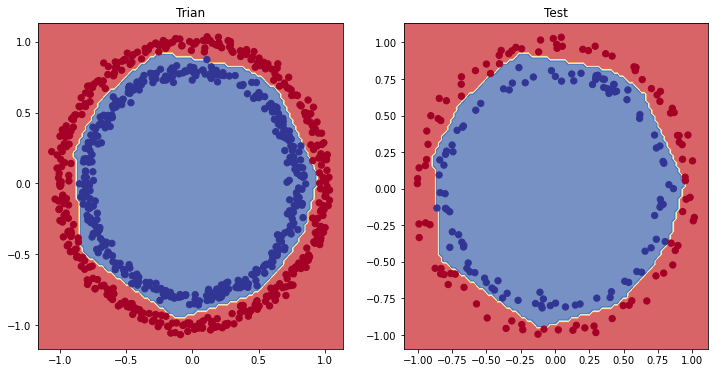

In [68]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Trian")
plot_decision_boundary(model_1_non_linear, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1_non_linear, X_test, y_test)

## Puting all together with multi-class classification problem


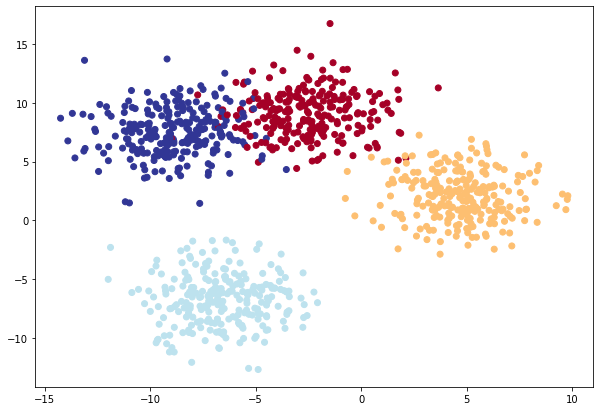

In [5]:
import torch 
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# Set hyper parametrs
NUM_CLASSES = 4
NUM_FEATURES =2
RANDOM_SEED = 42

# Create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=2, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# Visualize, Visualize, Visualize
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

## Bulding a multi class model classification

In [6]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [89]:
# Build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

  # Create an instance of blobModel send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [90]:
# Create Loss function and Optimizer
## Croos entropy loss for multi-class classification problems
loss_fn = nn.CrossEntropyLoss()

# Use SGD
optimizer = torch.optim.SGD(params=model_4.parameters(),
                           lr=0.1)

### Getting prediction probilities for a multi-class pyTorch model

In [91]:
# Lets get some row output of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.8118, -0.8307, -1.6751, -1.1760],
        [-0.0902, -0.9269, -0.5813, -0.1338],
        [ 0.2456, -0.2423,  0.1883, -0.0032],
        [-0.3472, -0.4911, -0.8196, -0.6231],
        [-0.3540, -1.4595, -1.3139, -0.4283],
        [-0.1611, -1.0871, -0.7362, -0.1712],
        [ 0.0953, -0.3387,  0.0747, -0.0551],
        [-0.2159, -1.1802, -0.9321, -0.2757],
        [ 0.2352, -0.2664,  0.1415,  0.0078],
        [-0.2434, -1.2318, -1.0178, -0.3158]], device='cuda:0')

In [92]:
y_blob_test[:5]

tensor([1., 3., 2., 1., 0.], device='cuda:0')

***SO*** we need to find a way to make y_preds like our output which is y_blob_test|

USe softmax for activation function in case that we have multi-class classification

In [93]:
# Convert our logits outputs to prediction probilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.8118, -0.8307, -1.6751, -1.1760],
        [-0.0902, -0.9269, -0.5813, -0.1338],
        [ 0.2456, -0.2423,  0.1883, -0.0032],
        [-0.3472, -0.4911, -0.8196, -0.6231],
        [-0.3540, -1.4595, -1.3139, -0.4283]], device='cuda:0')
tensor([[0.3228, 0.3168, 0.1361, 0.2243],
        [0.3331, 0.1443, 0.2038, 0.3188],
        [0.2996, 0.1839, 0.2829, 0.2336],
        [0.3078, 0.2666, 0.1919, 0.2336],
        [0.3785, 0.1253, 0.1449, 0.3514]], device='cuda:0')


In [94]:
# Convert our prediction probilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
print(y_preds[:5])
print(y_blob_test[:5])

tensor([0, 0, 0, 0, 0], device='cuda:0')
tensor([1., 3., 2., 1., 0.], device='cuda:0')


In [95]:
### Creating training lopp and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

# Move our datas into target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### Training 
  model_4.train()

  # forward pass 
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Loss / Acc
  train_loss = loss_fn(y_logits, y_blob_train.long()) 
  train_acc = accuracy_fn(y_true=y_blob_train,
                    y_preds=y_preds)
  
  # Optimizer
  optimizer.zero_grad()

  # Loss backward
  train_loss.backward()

  # Optim step
  optimizer.step()

  ### Test
  with torch.inference_mode():
    
    # Forward pass
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # Loss / Acc
    test_loss = loss_fn(test_logits, y_blob_test.long())
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_preds=test_preds)
    
    ### Print what is happenin
  if epoch % 100 == 0:
    print(f"Epochs: {epoch} | Train Loss: {train_loss:.5f}, Train ACC: {train_acc:.2f}%, | Test Loss: {test_loss:.5f}, Test ACC: {test_acc:.2f}%")
 


Epochs: 0 | Train Loss: 1.16741, Train ACC: 40.50%, | Test Loss: 1.08563, Test ACC: 50.00%
Epochs: 100 | Train Loss: 0.09826, Train ACC: 96.12%, | Test Loss: 0.08539, Test ACC: 96.50%
Epochs: 200 | Train Loss: 0.09073, Train ACC: 96.38%, | Test Loss: 0.07950, Test ACC: 96.50%
Epochs: 300 | Train Loss: 0.08767, Train ACC: 96.38%, | Test Loss: 0.07619, Test ACC: 96.50%
Epochs: 400 | Train Loss: 0.08548, Train ACC: 96.50%, | Test Loss: 0.07306, Test ACC: 97.00%
Epochs: 500 | Train Loss: 0.08379, Train ACC: 96.50%, | Test Loss: 0.07053, Test ACC: 97.50%
Epochs: 600 | Train Loss: 0.08238, Train ACC: 96.38%, | Test Loss: 0.06851, Test ACC: 97.50%
Epochs: 700 | Train Loss: 0.08117, Train ACC: 96.38%, | Test Loss: 0.06681, Test ACC: 97.50%
Epochs: 800 | Train Loss: 0.08138, Train ACC: 96.25%, | Test Loss: 0.06783, Test ACC: 96.50%
Epochs: 900 | Train Loss: 0.07932, Train ACC: 96.38%, | Test Loss: 0.06382, Test ACC: 97.50%
Epochs: 1000 | Train Loss: 0.07841, Train ACC: 96.25%, | Test Loss: 0.06

In [96]:
epochs = 1
for epoch in range(epochs):
  model_4.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # Loss / Acc
    test_loss = loss_fn(test_logits, y_blob_test.long())
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_preds=test_preds)
  if epoch % 10 == 0:
    print(f"Epochs: {epoch} | Test Loss: {test_loss:.5f}, Test ACC: {test_acc:.2f}%")
    print(classification_report(y_blob_test.to("cpu"), test_preds.to("cpu")))
 

Epochs: 0 | Test Loss: 0.05487, Test ACC: 98.00%
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        49
         1.0       1.00      0.98      0.99        41
         2.0       1.00      1.00      1.00        53
         3.0       0.98      0.96      0.97        57

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [97]:
# Make prediction
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# VIew the first 10
y_logits[:10]

tensor([[  1.9653,   9.9260, -12.0462, -11.2975],
        [  0.0309,  -6.4622,  -8.3208,   3.9918],
        [ -5.2623,  -4.7617,   5.6911,  -3.8505],
        [ -1.1179,   8.3859,  -6.5400,  -7.0729],
        [  6.5394,   0.2938, -14.8601,  -6.8518],
        [ -0.2303,  -8.2562, -10.4767,   5.4371],
        [ -4.2369,  -3.6463,   4.7654,  -3.1254],
        [  4.5116,  -2.9541, -11.5743,  -2.7312],
        [ -7.1238,  -6.7915,   7.2821,  -4.9405],
        [  5.1555,  -1.6254, -12.4820,  -4.2351]], device='cuda:0')

In [98]:
# Logits -> pred prob
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[3.4877e-04, 9.9965e-01, 2.8671e-10, 6.0614e-10],
        [1.8689e-02, 2.8292e-05, 4.4105e-06, 9.8128e-01],
        [1.7497e-05, 2.8864e-05, 9.9988e-01, 7.1796e-05],
        [7.4561e-05, 9.9992e-01, 3.2939e-07, 1.9332e-07],
        [9.9806e-01, 1.9353e-03, 5.0757e-10, 1.5256e-06],
        [3.4448e-03, 1.1261e-06, 1.2224e-07, 9.9655e-01],
        [1.2304e-04, 2.2210e-04, 9.9928e-01, 3.7393e-04],
        [9.9871e-01, 5.7163e-04, 1.0314e-07, 7.1439e-04],
        [5.5409e-07, 7.7254e-07, 9.9999e-01, 4.9179e-06],
        [9.9878e-01, 1.1339e-03, 2.1859e-08, 8.3404e-05]], device='cuda:0')

In [99]:
# pred probs -> pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

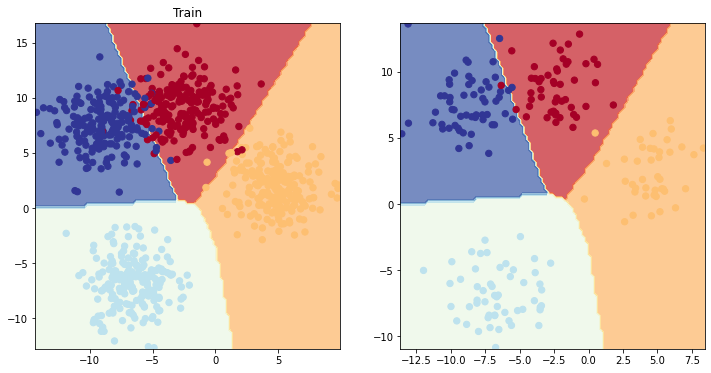

In [100]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1 , 2, 2)
plot_decision_boundary(model_4, X_blob_test, y_blob_test)